In [1]:

import keras
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import pandas as pd
import numpy as np
from tqdm import tqdm

Using TensorFlow backend.


## Image reading Preview

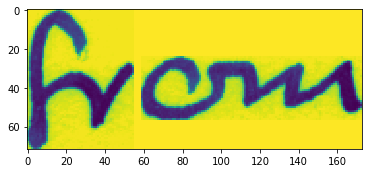

In [7]:
#Use matplotlibs "mpimg.imread" for plotting images
img=mpimg.imread('words/a01/a01-000u/a01-000u-00-06.png')

#Plot image var
imgplot = plt.imshow(img)

## Cleaning Text Data and Creating DataFrame


In [8]:
#access label information from text file
#open file as text object

text_object = open(r'words.txt')

In [9]:
#read the contents of text object

words_text_1 = text_object.readlines()

In [10]:
#slice unwanted headers from text object

words_text = words_text_1[18:]

In [11]:
#preview the results of new list

words_text[:10]

['a01-000u-00-00 ok 154 408 768 27 51 AT A\n',
 'a01-000u-00-01 ok 154 507 766 213 48 NN MOVE\n',
 'a01-000u-00-02 ok 154 796 764 70 50 TO to\n',
 'a01-000u-00-03 ok 154 919 757 166 78 VB stop\n',
 'a01-000u-00-04 ok 154 1185 754 126 61 NPT Mr.\n',
 'a01-000u-00-05 ok 154 1438 746 382 73 NP Gaitskell\n',
 'a01-000u-00-06 ok 154 1896 757 173 72 IN from\n',
 'a01-000u-01-00 ok 156 395 932 441 100 VBG nominating\n',
 'a01-000u-01-01 ok 156 901 958 147 79 DTI any\n',
 'a01-000u-01-02 ok 156 1112 958 208 42 AP more\n']

In [12]:
#split each section into comma seperated values

comma_sep = []

for x in words_text: 
    comma_sep.append(x.split())
    

In [13]:
#check the results of the split, by checking length and previewing values

print('number of image files is:', len(comma_sep,))

print('\n','first entry:', comma_sep[1],'\n','\n','last entry:', comma_sep[-1])

number of image files is: 115320

 first entry: ['a01-000u-00-01', 'ok', '154', '507', '766', '213', '48', 'NN', 'MOVE'] 
 
 last entry: ['r06-143-04-10', 'ok', '186', '1892', '1453', '36', '66', '?', '?']


In [9]:
#comma_sep

[['a01-000u-00-00', 'ok', '154', '408', '768', '27', '51', 'AT', 'A'],
 ['a01-000u-00-01', 'ok', '154', '507', '766', '213', '48', 'NN', 'MOVE'],
 ['a01-000u-00-02', 'ok', '154', '796', '764', '70', '50', 'TO', 'to'],
 ['a01-000u-00-03', 'ok', '154', '919', '757', '166', '78', 'VB', 'stop'],
 ['a01-000u-00-04', 'ok', '154', '1185', '754', '126', '61', 'NPT', 'Mr.'],
 ['a01-000u-00-05',
  'ok',
  '154',
  '1438',
  '746',
  '382',
  '73',
  'NP',
  'Gaitskell'],
 ['a01-000u-00-06', 'ok', '154', '1896', '757', '173', '72', 'IN', 'from'],
 ['a01-000u-01-00',
  'ok',
  '156',
  '395',
  '932',
  '441',
  '100',
  'VBG',
  'nominating'],
 ['a01-000u-01-01', 'ok', '156', '901', '958', '147', '79', 'DTI', 'any'],
 ['a01-000u-01-02', 'ok', '156', '1112', '958', '208', '42', 'AP', 'more'],
 ['a01-000u-01-03', 'ok', '156', '1400', '937', '294', '59', 'NN', 'Labour'],
 ['a01-000u-01-04', 'ok', '156', '1779', '932', '174', '63', 'NN', 'life'],
 ['a01-000u-01-05', 'ok', '156', '2008', '933', '237',

In [14]:
#iterate through split list and select desired values via index


images = []
targets = []
status_code = []

for target in comma_sep:
    images.append(target[0])
    status_code.append(target[1])
    targets.append(target[-1])
   
    

In [15]:
#convert lists to arrays, and then pandas series

img_array = np.array(images)
target_array = np.array(targets)
status_array = np.array(status_code)

img_series = pd.Series(img_array)
target_series = pd.Series(target_array)
status_series = pd.Series(status_array)

In [16]:
#preview series
status_series

0         ok
1         ok
2         ok
3         ok
4         ok
          ..
115315    ok
115316    ok
115317    ok
115318    ok
115319    ok
Length: 115320, dtype: object

In [17]:
#convert series to dataframe objects
img_df = pd.DataFrame(img_series)
target_df = pd.DataFrame(target_series)
status_df = pd.DataFrame(status_series)

In [18]:
#merge dataframe objects into one main df

df_1 = img_df.merge(status_df, left_index=True, right_index=True)

df = df_1.merge(target_df, left_index = True, right_index = True)

In [19]:
#preview df and rename columns
df.head(2)

,0_x,0_y,0
0,a01-000u-00-00,ok,A
1,a01-000u-00-01,ok,MOVE


In [20]:
df.rename(columns={'0_x': 'image', '0_y':'status_code', 0 : 'target'}, inplace=True)

In [16]:
df

,image,status_code,target
0,a01-000u-00-00,ok,A
1,a01-000u-00-01,ok,MOVE
2,a01-000u-00-02,ok,to
3,a01-000u-00-03,ok,stop
4,a01-000u-00-04,ok,Mr.
...,...,...,...
115315,r06-143-04-06,ok,him
115316,r06-143-04-07,ok,in
115317,r06-143-04-08,ok,the
115318,r06-143-04-09,ok,garden


In [21]:
#create df object for known error image files
status_err = df[df['status_code'] == 'err']

In [22]:
status_err.shape
status_err.head()

,image,status_code,target
22,a01-000u-03-00,err,Ps
23,a01-000u-03-01,err,tomorrow
24,a01-000u-03-02,err,.
25,a01-000u-03-03,err,Mr.
26,a01-000u-03-04,err,Michael


In [23]:
#remove image files with known error val
df.drop(status_err.index, inplace=True)

In [24]:
#inspect shape of new df
df

,image,status_code,target
0,a01-000u-00-00,ok,A
1,a01-000u-00-01,ok,MOVE
2,a01-000u-00-02,ok,to
3,a01-000u-00-03,ok,stop
4,a01-000u-00-04,ok,Mr.
...,...,...,...
115315,r06-143-04-06,ok,him
115316,r06-143-04-07,ok,in
115317,r06-143-04-08,ok,the
115318,r06-143-04-09,ok,garden


In [25]:
df['image'] = df['image'].astype(str) + '.png'


In [26]:
pd.set_option('display.max_rows', None)

In [27]:
value_counts_df = pd.DataFrame(df['target'].value_counts().head(100))

In [28]:
top_100 = value_counts_df.reset_index()

In [29]:
top_100.head()

,index,target
0,the,4986
1,",",4376
2,.,4094
3,of,2741
4,to,2255


In [30]:
top_100.rename(columns = {'index': 'word', 'target': 'count'}, inplace = True)

In [31]:
top_100.head()

,word,count
0,the,4986
1,",",4376
2,.,4094
3,of,2741
4,to,2255


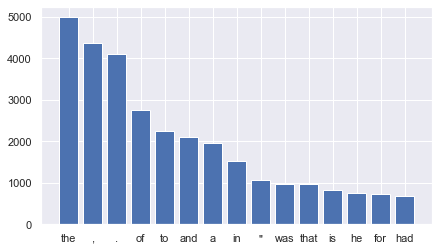

In [37]:
fig, ax = plt.subplots(figsize = (7,4))

sns.set(style = 'darkgrid')

plt.bar('word', 'count', data = top_100[:15])
# plt.xlabel('Word', fontsize = 18)
# plt.ylabel('Count', fontsize = 12)
plt.show()


In [5]:
def img_plotter(images):
    for pics in images:
        try:
            img=mpimg.imread('words/a01/a01-000u/'f'{pics}')
            imgplot = plt.imshow(img)
        except:
            print('path not found')
    return imgplot

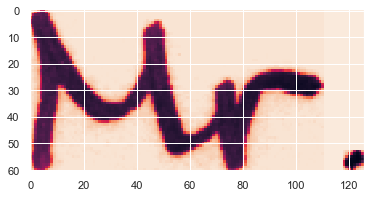

In [38]:
img_plotter(df['image'][:5])

In [102]:
df['image'][:10]

0    a01-000u-00-00.png
1    a01-000u-00-01.png
2    a01-000u-00-02.png
3    a01-000u-00-03.png
4    a01-000u-00-04.png
5    a01-000u-00-05.png
6    a01-000u-00-06.png
7    a01-000u-01-00.png
8    a01-000u-01-01.png
9    a01-000u-01-02.png
Name: image, dtype: object

In [90]:
df.head(3)

,image,status_code,target
0,a01-000u-00-00.png,ok,A
1,a01-000u-00-01.png,ok,MOVE
2,a01-000u-00-02.png,ok,to


In [13]:



# test_array = []
# png_array = []

# for root, dirs, files in os.walk("words"):
#     for name in files:
#         test_array.append(os.path.join(root, name))
#     for name in dirs:
#         test_array.append(os.path.join(root, name))
#     #for new in name:
#         #if '.png' in new:
#            # png_array.append(os.path.join(root, name))